In [8]:
import pandas as pd
import numpy as np
import bamboolib as bam
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

from sklearn.metrics import roc_curve, roc_auc_score


In [9]:
# Import Data
train = pd.read_csv(r'/Users/lucyleng/Desktop/Porto Seguro Insurance Project/train.csv')

In [10]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [29]:
from sklearn.utils import shuffle
idx_class_0 = train.index[train['target']==0].tolist()
idx_class_1 = train.index[train['target']==1].tolist()
import random
undersampled_idx = shuffle(train[train['target'].isin([0])],random_state = 100)


In [25]:
# Step 1
def undersampling(df, desired_prop_rate = 0.15):
    '''This function is used to calculate undersampling rate and undersampled majority_size for the train set'''
    # Get index for target=0 and 1
    idx_class_0 = train.index[train['target']==0].tolist()
    idx_class_1 = train.index[train['target']==1].tolist()
    
    # Get the number of targets=0 and 1
    count_class_0, count_class_1 = train.target.value_counts()
    
    # Calculate the undersampling rate according to the above equation
    undersampling_rate = ((1-desired_prop_rate)*count_class_1)/(desired_prop_rate*count_class_0)
    undersampled_majority_size = count_class_0
    
    print(f"关于target=0的欠采样比率为:【{undersampling_rate}】")
    print(f"在欠采样之后，target=0的数量为：【{undersampled_majority_size}】")
    
    
    from sklearn.utils import shuffle
    
    # 用shuffle函数对target=0的所有数据打乱抽样，seed=100,抽样数为刚刚计算的值
    undersampled_idx = shuffle(df[df['target'].isin([0])],random_state = 100)
    
    # 把undersampling之后的idx和之前的target=1的idx合并，并在train里面根据idx把数据索引出来
    idx_total = pd.concat([undersampled_idx,df[df['target'].isin([1])]])
    
    df = df.loc[idx_total].reset_index(drop=True)
    
    return df

In [26]:
undersampling(df = train)

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【573518】


NameError: name 'concat' is not defined

In [ ]:
df.to_csv("Undersampling_train.csv")

In [ ]:
#Step 2: 尝试用`SMOTEENN`对数据进行处理。

In [34]:
from sklearn.decomposition import PCA
n_comp = 20
print('\nPCA执行中...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=0)
X_ = train.loc[:, train.columns != 'target']
y_ = train['target']
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=1996)


X_pca = pca.fit_transform(X_train)
print('Total Explained variance: %.4f' % pca.explained_variance_ratio_.sum())


PCA执行中...
Total Explained variance: 1.0000


Text(9, 0.97, 'cumulative explained var: 0.98')

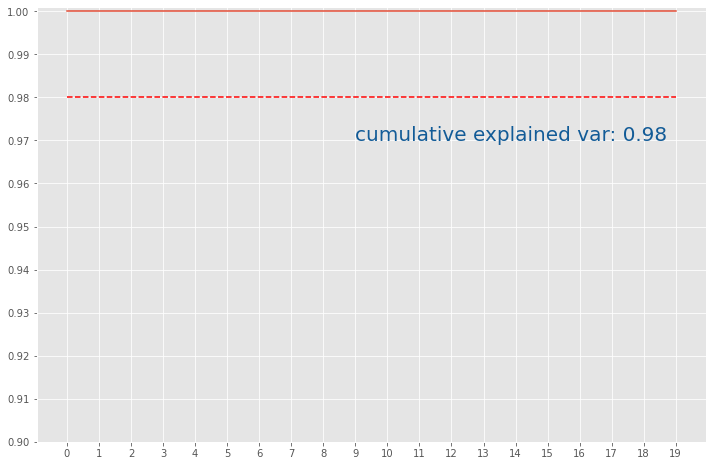

In [35]:
plt.figure(figsize = [12,8])

pd.Series(pca.explained_variance_ratio_).cumsum().plot()

plt.plot(range(n_comp),[0.98]*20, 'r--')
plt.xticks(ticks = range(n_comp))
plt.yticks(ticks = np.linspace(0.9,1,11))
plt.text(9,0.97,'cumulative explained var: 0.98',fontsize = 20, color = '#125b97')

In [45]:
n = 0

In [46]:
pca = PCA(n_components= n, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X_train)

In [2]:
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE# random_state = 0
# track running time 
import time
start = time.process_time()

smote_enn = SMOTEENN(random_state = 10)
X_smen, y_smen = smote_enn.fit_resample(X_train,y_train)

print(time.process_time() - start)

NameError: name 'X_train' is not defined